# Yield Curve Construction – Interpolation Methods

### Import Liabries

In [2]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

### Extrat Data

In [4]:
dayCountMapping = {'1 Mo': 30, '2 Mo': 60, '3 Mo': 90, '4 Mo': 120, '6 Mo': 180, '1 Yr': 360, 
                   '2 Yr': 720, '3 Yr': 1080, '5 Yr': 1800, '7 Yr': 2520, '10 Yr': 3600, '20 Yr': 7200, '30 Yr': 10800}
print(dayCountMapping)

{'1 Mo': 30, '2 Mo': 60, '3 Mo': 90, '4 Mo': 120, '6 Mo': 180, '1 Yr': 360, '2 Yr': 720, '3 Yr': 1080, '5 Yr': 1800, '7 Yr': 2520, '10 Yr': 3600, '20 Yr': 7200, '30 Yr': 10800}


In [5]:
class InterestRates:

    def __init__(self, Y):
        self.Y = Y

    def USTreasury(self, ratesCurve=False, COBDate=None):
        USTreasuryData = pd.read_csv(f'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{self.Y}/all?type=daily_treasury_yield_curve&field_tdr_date_value={self.Y}&page&_format=csv', index_col='Date').iloc[::-1]  
        USTreasuryData.index = pd.to_datetime(USTreasuryData.index)
        
        if ratesCurve == True:
            if COBDate == None:
                return USTreasuryData[USTreasuryData.index == USTreasuryData.index.max()]
            else:
                return USTreasuryData[USTreasuryData.index == COBDate]
        else:
            return USTreasuryData

### Yield Curve

In [7]:
USTreasuryCurve = InterestRates(Y=2022).USTreasury(ratesCurve = True, COBDate = pd.to_datetime('2022-01-03'))
USTreasuryCurve

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22,0.4,0.78,1.04,1.37,1.55,1.63,2.05,2.01


In [8]:
USTreasuryCurve_ = pd.DataFrame(data = USTreasuryCurve.values, index=USTreasuryCurve.index, columns=dayCountMapping.values())
USTreasuryCurve_

,30,60,90,120,180,360,720,1080,1800,2520,3600,7200,10800
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22,0.4,0.78,1.04,1.37,1.55,1.63,2.05,2.01


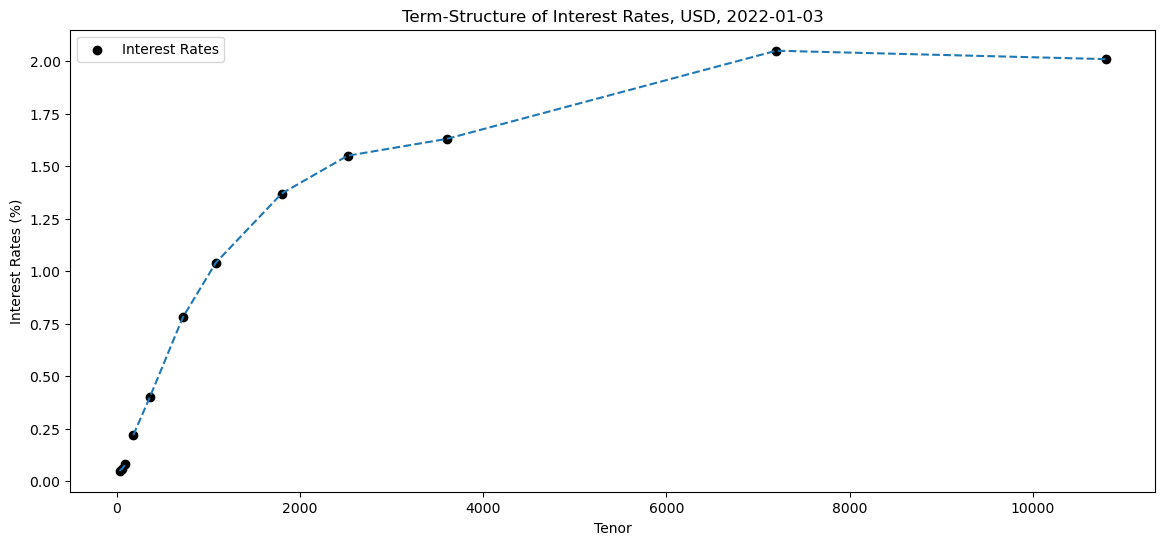

In [9]:
plt.figure(figsize=(14,6))
plt.scatter(x = USTreasuryCurve_.columns, y = USTreasuryCurve_.values, color = 'k', label = 'Interest Rates')
plt.plot(USTreasuryCurve_.transpose(), linestyle='--')
plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

#### Interpolation Methods

##    1. Linear Interpolation Method

        Linear function: y = a + b.x
            a is the y-intercept
            b is the co-efficent of the first-order (Linear Term)

        Interpolation Formula: y=y1+(((y2-y1)/(x2-x1))/(x-x1))

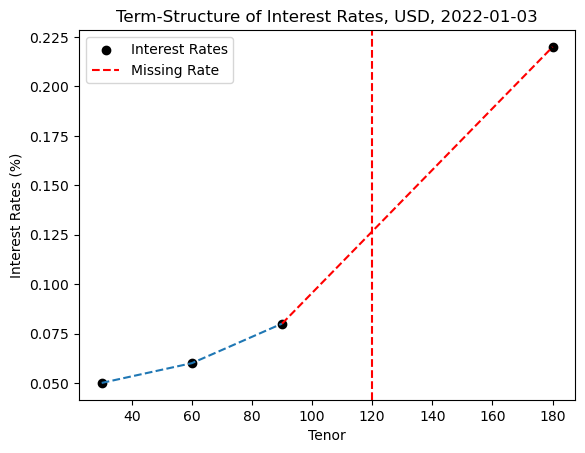

In [12]:
USTreasuryCurve_f = USTreasuryCurve_.iloc[:,0:5]

# plt.figure(figsize=(14,6))
plt.scatter(x = USTreasuryCurve_f.columns, y = USTreasuryCurve_f.values, color = 'k', label = 'Interest Rates')
plt.plot(USTreasuryCurve_f.transpose(), linestyle='--')

plt.axvline(120,color='r',linestyle='--',label='Missing Rate')
plt.plot([90,180],[0.08,0.22],color='r',linestyle='--')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_f.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [13]:
interpolatedRate = 0.08 + ((0.22 - 0.08) / (180 - 90)) * (120 - 90)
print('Interpolated Rate at 4M Maturity:', interpolatedRate)

Interpolated Rate at 4M Maturity: 0.12666666666666668


In [14]:
interpolatedRate = 0.08+((120-90) / (180-90))*(0.22-0.08)
print('Interpolated Rate at 4M Maturity:', interpolatedRate)

Interpolated Rate at 4M Maturity: 0.12666666666666668


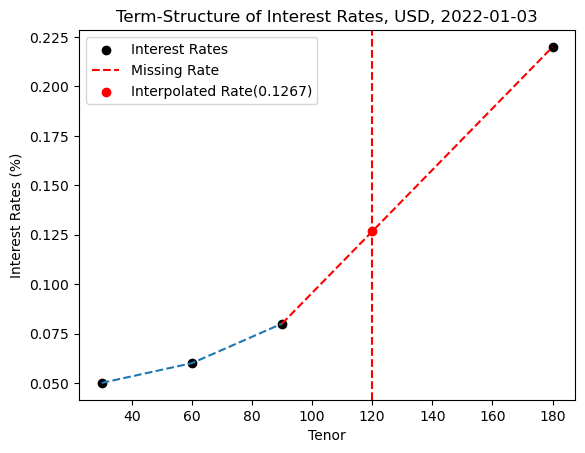

In [15]:
USTreasuryCurve_f = USTreasuryCurve_.iloc[:,0:5]

# plt.figure(figsize=(14,6))
plt.scatter(x = USTreasuryCurve_f.columns, y = USTreasuryCurve_f.values, color = 'k', label = 'Interest Rates')
plt.plot(USTreasuryCurve_f.transpose(), linestyle='--')

plt.axvline(120,color='r',linestyle='--',label='Missing Rate')
plt.plot([90,180],[0.08,0.22],color='r',linestyle='--')
plt.scatter(x=120,y=interpolatedRate,color='r',label=f'Interpolated Rate({round(interpolatedRate,4)})')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_f.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [16]:
slope1, slope2, slope3 = (0.06 - 0.05) / (60 - 30), (0.08 - 0.06) / (90 - 60), (0.22 - 0.08) / (180 - 90)
print(slope1, slope2, slope3)

0.00033333333333333316 0.0006666666666666668 0.0015555555555555557


In [17]:
USTreasuryCurve_.interpolate(method='index',axis='columns',limit=3,limit_direction='both')

,30,60,90,120,180,360,720,1080,1800,2520,3600,7200,10800
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.126667,0.22,0.4,0.78,1.04,1.37,1.55,1.63,2.05,2.01


#### `Interpolating Time-Series`

In [19]:
USTreasuryData = InterestRates(Y=2022).USTreasury()
USTreasuryData_ = pd.DataFrame(data=USTreasuryData.values,index=USTreasuryData.index,columns=dayCountMapping.values())
USTreasuryData_

,30,60,90,120,180,360,720,1080,1800,2520,3600,7200,10800
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3.80,4.20,4.34,4.59,4.67,4.66,4.31,4.09,3.86,3.83,3.75,3.99,3.82
2022-12-27,3.87,4.32,4.46,4.66,4.76,4.75,4.32,4.17,3.94,3.93,3.84,4.10,3.93
2022-12-28,3.86,4.33,4.46,4.66,4.75,4.71,4.31,4.18,3.97,3.97,3.88,4.13,3.98


In [20]:
USTreasuryData_[[15,1440,2160,14400,18000]] = np.nan
USTreasuryData_ = USTreasuryData_[USTreasuryData_.columns.sort_values()]

In [21]:
USTreasuryData_.interpolate(method='index',axis='columns',limit=3,limit_direction='both')

,15,30,60,90,120,180,360,720,1080,1440,1800,2160,2520,3600,7200,10800,14400,18000
Date,,,,,,,,,,,,,,,,,,
2022-01-03,0.05,0.05,0.06,0.08,0.126667,0.22,0.40,0.78,1.04,1.205,1.37,1.460,1.55,1.63,2.05,2.01,2.01,2.01
2022-01-04,0.06,0.06,0.05,0.08,0.126667,0.22,0.38,0.77,1.02,1.195,1.37,1.470,1.57,1.66,2.10,2.07,2.07,2.07
2022-01-05,0.05,0.05,0.06,0.09,0.133333,0.22,0.41,0.83,1.10,1.265,1.43,1.525,1.62,1.71,2.12,2.09,2.09,2.09
2022-01-06,0.04,0.04,0.05,0.10,0.143333,0.23,0.45,0.88,1.15,1.310,1.47,1.565,1.66,1.73,2.12,2.09,2.09,2.09
2022-01-07,0.05,0.05,0.05,0.10,0.146667,0.24,0.43,0.87,1.17,1.335,1.50,1.595,1.69,1.76,2.15,2.11,2.11,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3.80,3.80,4.20,4.34,4.590000,4.67,4.66,4.31,4.09,3.975,3.86,3.845,3.83,3.75,3.99,3.82,3.82,3.82
2022-12-27,3.87,3.87,4.32,4.46,4.660000,4.76,4.75,4.32,4.17,4.055,3.94,3.935,3.93,3.84,4.10,3.93,3.93,3.93
2022-12-28,3.86,3.86,4.33,4.46,4.660000,4.75,4.71,4.31,4.18,4.075,3.97,3.970,3.97,3.88,4.13,3.98,3.98,3.98


<Axes: xlabel='Date'>

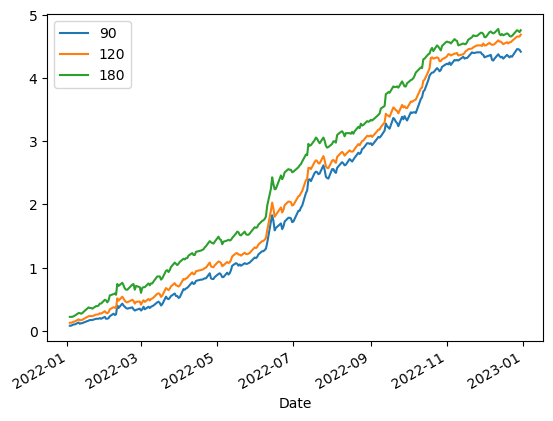

In [22]:
USTreasuryData_.interpolate(method='index',axis='columns',limit=3,limit_direction='both')[[90,120,180]].plot(legend=True)

#### 02. Ploynomial Interpolation

            Quartic Function : y = a + b1.x1 + b2.x1^2
                a is the y-intercept
                b1 is the co-efficent of the first-order (Linear Term)
                b2 is the co-efficent of the Second-order (Quadratic Term)

            y = a + b1.x1 + b2.x1^2.... Subsitute
                y1 = a + b1.x1 + b2.x1^2
                y2 = a + b1.x2 + b2.x2^2
                y3 = a + b1.x3 + b2.x3^2

            cubic function: y = a + b1.x + b2.x^2 + b3.x^3
                ...
                b3 is the coefficient of the third-order (cubic term).
            
            quartic function: y = a + b1.x + b2.x^2 + b3.x^3 + b4.x^4
                ...
                b4 is the coefficient of the fourth-order (quartic term).
            
            infinite series function: y = a + b1.x + b2.x^2 + b3.x^3 + ..... + bn.x^n

            1. Vandermonde Matrix Interpolation
            2. Lagrange Interpolation
            3. Newton Interpolation (Divided Difference)
            4. Cubic Spline Interpolation

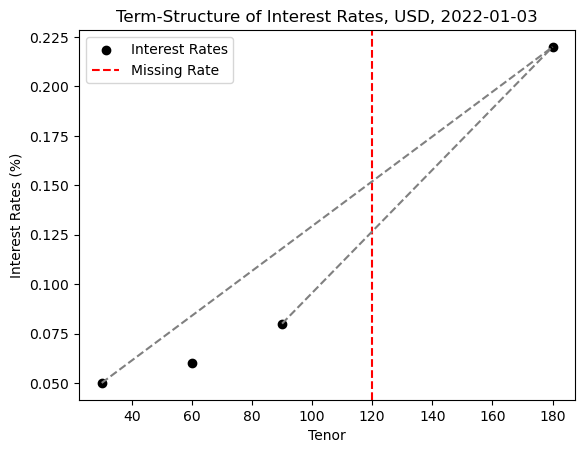

In [24]:
USTreasuryCurve_f = USTreasuryCurve_.iloc[:,0:5]

# plt.figure(figsize=(14,6))
plt.scatter(x = USTreasuryCurve_f.columns, y = USTreasuryCurve_f.values, color = 'k', label = 'Interest Rates')
# plt.plot(USTreasuryCurve_f.transpose(), linestyle='--')

plt.axvline(120,color='r',linestyle='--',label='Missing Rate')
plt.plot([90,180],[0.08,0.22],color='grey',linestyle='--')
plt.plot([30,180],[0.05,0.22],color='grey',linestyle='--')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_f.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [25]:
USTreasuryData_.interpolate(method='polynomial', axis='columns', limit=3, limit_direction='both', order=2)

,15,30,60,90,120,180,360,720,1080,1440,1800,2160,2520,3600,7200,10800,14400,18000
Date,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,0.05,0.06,0.08,0.117615,0.22,0.40,0.78,1.04,1.227944,1.37,1.476502,1.55,1.63,2.05,2.01,NaN,NaN
2022-01-04,NaN,0.06,0.05,0.08,0.123655,0.22,0.38,0.77,1.02,1.212854,1.37,1.488139,1.57,1.66,2.10,2.07,NaN,NaN
2022-01-05,NaN,0.05,0.06,0.09,0.129930,0.22,0.41,0.83,1.10,1.288204,1.43,1.540712,1.62,1.71,2.12,2.09,NaN,NaN
2022-01-06,NaN,0.04,0.05,0.10,0.148804,0.23,0.45,0.88,1.15,1.333641,1.47,1.580528,1.66,1.73,2.12,2.09,NaN,NaN
2022-01-07,NaN,0.05,0.05,0.10,0.151976,0.24,0.43,0.87,1.17,1.364164,1.50,1.610436,1.69,1.76,2.15,2.11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,NaN,3.80,4.20,4.34,4.590000,4.67,4.66,4.31,4.09,3.947688,3.86,3.833885,3.83,3.75,3.99,3.82,NaN,NaN
2022-12-27,NaN,3.87,4.32,4.46,4.660000,4.76,4.75,4.32,4.17,4.044848,3.94,3.920594,3.93,3.84,4.10,3.93,NaN,NaN
2022-12-28,NaN,3.86,4.33,4.46,4.660000,4.75,4.71,4.31,4.18,4.066402,3.97,3.956750,3.97,3.88,4.13,3.98,NaN,NaN


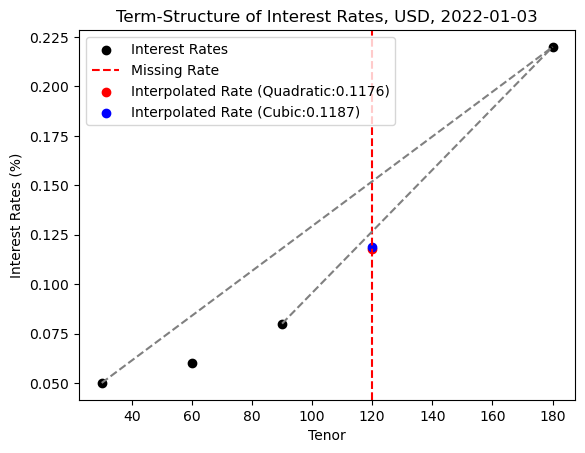

In [26]:
USTreasuryCurve_f = USTreasuryCurve_.iloc[:,0:5]

# plt.figure(figsize=(14,6))
plt.scatter(x = USTreasuryCurve_f.columns, y = USTreasuryCurve_f.values, color = 'k', label = 'Interest Rates')
# plt.plot(USTreasuryCurve_f.transpose(), linestyle='--')

plt.axvline(120,color='r',linestyle='--',label='Missing Rate')
plt.plot([90,180],[0.08,0.22],color='grey',linestyle='--')
plt.plot([30,180],[0.05,0.22],color='grey',linestyle='--')

interpolatedRate = USTreasuryCurve_.interpolate(method='polynomial', axis='columns', limit=3, limit_direction='both', order=2)[120].values[0]
plt.scatter(x=120, y=interpolatedRate, color='r', label=f'Interpolated Rate (Quadratic:{round(interpolatedRate, 4)})')

interpolatedRate = USTreasuryCurve_.interpolate(method='polynomial', axis='columns', limit=3, limit_direction='both', order=3)[120].values[0]
plt.scatter(x=120, y=interpolatedRate, color='b', label=f'Interpolated Rate (Cubic:{round(interpolatedRate, 4)})')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_f.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [27]:
USTreasuryData_.interpolate(method='polynomial', axis='columns', limit=3, limit_direction='both', order=3)

,15,30,60,90,120,180,360,720,1080,1440,1800,2160,2520,3600,7200,10800,14400,18000
Date,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,0.05,0.06,0.08,0.118653,0.22,0.40,0.78,1.04,1.224175,1.37,1.477867,1.55,1.63,2.05,2.01,NaN,NaN
2022-01-04,NaN,0.06,0.05,0.08,0.124774,0.22,0.38,0.77,1.02,1.207738,1.37,1.490421,1.57,1.66,2.10,2.07,NaN,NaN
2022-01-05,NaN,0.05,0.06,0.09,0.130653,0.22,0.41,0.83,1.10,1.284333,1.43,1.541883,1.62,1.71,2.12,2.09,NaN,NaN
2022-01-06,NaN,0.04,0.05,0.10,0.149076,0.23,0.45,0.88,1.15,1.331138,1.47,1.581104,1.66,1.73,2.12,2.09,NaN,NaN
2022-01-07,NaN,0.05,0.05,0.10,0.152606,0.24,0.43,0.87,1.17,1.361088,1.50,1.610765,1.69,1.76,2.15,2.11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,NaN,3.80,4.20,4.34,4.590000,4.67,4.66,4.31,4.09,3.956800,3.86,3.830912,3.83,3.75,3.99,3.82,NaN,NaN
2022-12-27,NaN,3.87,4.32,4.46,4.660000,4.76,4.75,4.32,4.17,4.056883,3.94,3.914638,3.93,3.84,4.10,3.93,NaN,NaN
2022-12-28,NaN,3.86,4.33,4.46,4.660000,4.75,4.71,4.31,4.18,4.077417,3.97,3.951088,3.97,3.88,4.13,3.98,NaN,NaN


<Axes: xlabel='Date'>

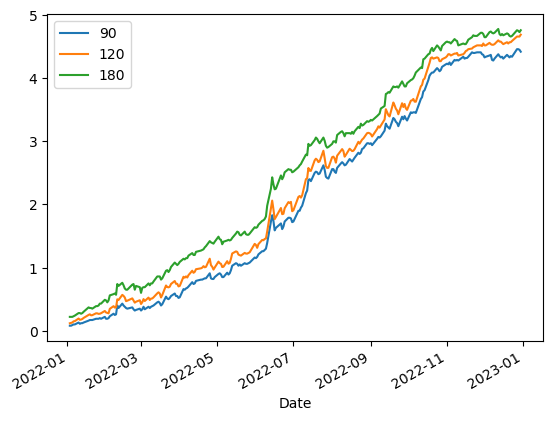

In [28]:
USTreasuryData_.interpolate(method='polynomial', axis='columns', limit=3, limit_direction='both', order=3)[[90,120,180]].plot(legend=True)

### Advanced Interpolation Methods

#### 1. Vandermonde Matrix Interpolation

        polynomial function: cubic function: y = a + b1.x + b2.x^2 + b3.x^3
            a is the intercept (a constant term),
            b1 is the linear term (associated with x),
            b2 is the quadratic term (associated with x^2),
            b3 is the cubic term (associated with x^3).

            y1 = a + b1.x1 + b2.x1^2 + b3.x1^3
          0.05 = a + b1.30 + b2.30^2 + b3.30^3   ... (1)
            
            y2 = a + b1.x2 + b2.x2^2 + b3.x2^3
          0.06 = a + b1.60 + b2.60^2 + b3.60^3   ... (2)
            
            y3 = a + b1.x3 + b2.x3^2 + b3.x3^3
          0.08 = a + b1.90 + b2.90^2 + b3.90^3   ... (3)
            
            y4 = a + b1.x4 + b2.x4^2 + b3.x4^3
          0.22 = a + b1.180 + b2.180^2 + b3.180^3  ... (4)

              Interest Rates = Coefficients * Vandermonde Matrix

              Coefficients = Interest Rates * Vandermonde Matrix^-1

In [57]:
USTreasuryCurve_f = USTreasuryCurve_.iloc[:,0:5]
tenors = USTreasuryCurve_f.dropna(axis="columns").columns
intrestRates = USTreasuryCurve_f.dropna(axis="columns").values[0]
print(tenors,intrestRates)

Index([30, 60, 90, 180], dtype='int64') [0.05 0.06 0.08 0.22]


In [59]:
USTreasuryCurve_f

,30,60,90,120,180
Date,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22


In [77]:
vanderMatrix = np.array([[x**i for i in range(len(tenors))] for x in tenors])
print(vanderMatrix)

[[      1      30     900   27000]
 [      1      60    3600  216000]
 [      1      90    8100  729000]
 [      1     180   32400 5832000]]


In [81]:
vanderMatrix = np.vander(x = tenors, increasing=True, N=4)
print(vanderMatrix)

[[      1      30     900   27000]
 [      1      60    3600  216000]
 [      1      90    8100  729000]
 [      1     180   32400 5832000]]


In [84]:
print(np.linalg.inv(vanderMatrix))

[[ 3.60000000e+00 -4.50000000e+00  2.00000000e+00 -1.00000000e-01]
 [-1.20000000e-01  2.25000000e-01 -1.11111111e-01  6.11111111e-03]
 [ 1.22222222e-03 -2.77777778e-03  1.66666667e-03 -1.11111111e-04]
 [-3.70370370e-06  9.25925926e-06 -6.17283951e-06  6.17283951e-07]]


In [88]:
cofficents = np.linalg.inv(vanderMatrix).dot(intrestRates)
print(cofficents.round(4))

[ 0.048 -0.     0.     0.   ]


    A.x = b, so mathematically, x = b.A^-1
    Where,
            A is the vandermonde matrix,
            x is the vector of coefficients we're solving for (a, b1, b2, b3), and
            b is the vector of interest rates.

In [96]:
cofficents = np.linalg.solve(vanderMatrix,intrestRates)
print(cofficents.round(4))

[ 0.048 -0.     0.     0.   ]


In [98]:
print(vanderMatrix.dot(cofficents))

[0.05 0.06 0.08 0.22]


In [102]:
tenorInter = np.vander([120],increasing=True, N=4)[0]
print(tenorInter)

[      1     120   14400 1728000]


In [106]:
interpolatedRate = np.dot(tenorInter,cofficents)
print('Interpolated Rate',interpolatedRate)

Interpolated Rate 0.112


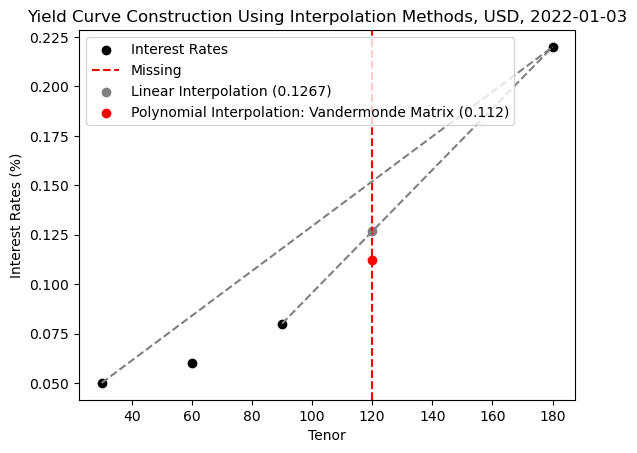

In [126]:
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')

plt.axvline(120, color='r', linestyle='--', label='Missing')
plt.plot([90, 180], [0.08, 0.22], color='grey', linestyle='--')
plt.plot([30, 180], [0.05, 0.22], color='grey', linestyle='--')

# linear interpolation
interpolatedRate_linear = 0.08 + ((0.22 - 0.08) / (180 - 90)) * (120 - 90)
plt.scatter(x=120, y=interpolatedRate_linear, color='grey', label=f'Linear Interpolation ({round(interpolatedRate_linear, 4)})')

# polynomial interpolation using vandermonde matrix
interpolatedRate_polynomial = np.dot(tenorInter, cofficents)
plt.scatter(x=120, y=interpolatedRate_polynomial, color='r', label=f'Polynomial Interpolation: Vandermonde Matrix ({round(interpolatedRate_polynomial, 4)})')

plt.title(f'Yield Curve Construction Using Interpolation Methods, USD, {USTreasuryCurve_f.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [124]:
tenorsInterp = np.linspace(min(tenors),max(tenors),max(tenors)-min(tenors)+1)
vanderMatrix = np.vander(tenorsInterp,increasing=True,N=4)
interpolatedRates = np.dot(vanderMatrix,cofficents)
print(interpolatedRates)

[0.05       0.05019335 0.05039565 0.050607   0.05082746 0.0510571
 0.051296   0.05154423 0.05180188 0.052069   0.05234568 0.05263199
 0.052928   0.05323379 0.05354943 0.053875   0.05421057 0.05455621
 0.054912   0.05527801 0.05565432 0.056041   0.05643812 0.05684577
 0.057264   0.0576929  0.05813254 0.058583   0.05904435 0.05951665
 0.06       0.06049446 0.0610001  0.061517   0.06204523 0.06258488
 0.063136   0.06369868 0.06427299 0.064859   0.06545679 0.06606643
 0.066688   0.06732157 0.06796721 0.068625   0.06929501 0.06997732
 0.070672   0.07137912 0.07209877 0.072831   0.0735759  0.07433354
 0.075104   0.07588735 0.07668365 0.077493   0.07831546 0.0791511
 0.08       0.08086223 0.08173788 0.082627   0.08352968 0.08444599
 0.085376   0.08631979 0.08727743 0.088249   0.08923457 0.09023421
 0.091248   0.09227601 0.09331832 0.094375   0.09544612 0.09653177
 0.097632   0.0987469  0.09987654 0.101021   0.10218035 0.10335465
 0.104544   0.10574846 0.1069681  0.108203   0.10945323 0.110718

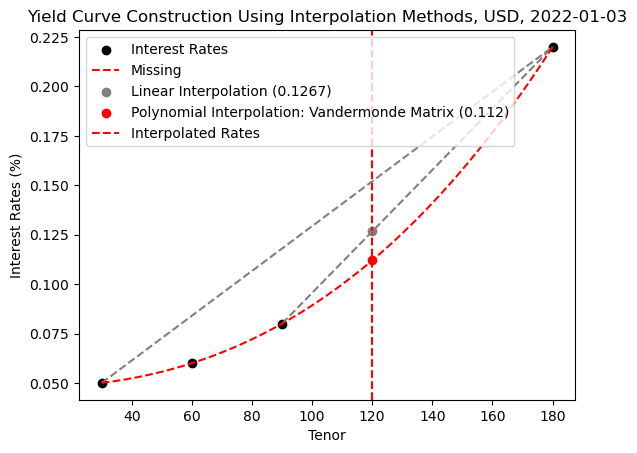

In [128]:
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')

plt.axvline(120, color='r', linestyle='--', label='Missing')
plt.plot([90, 180], [0.08, 0.22], color='grey', linestyle='--')
plt.plot([30, 180], [0.05, 0.22], color='grey', linestyle='--')

# linear interpolation
interpolatedRate_linear = 0.08 + ((0.22 - 0.08) / (180 - 90)) * (120 - 90)
plt.scatter(x=120, y=interpolatedRate_linear, color='grey', label=f'Linear Interpolation ({round(interpolatedRate_linear, 4)})')

# polynomial interpolation using vandermonde matrix
interpolatedRate_polynomial = np.dot(tenorInter, cofficents)
plt.scatter(x=120, y=interpolatedRate_polynomial, color='r', label=f'Polynomial Interpolation: Vandermonde Matrix ({round(interpolatedRate_polynomial, 4)})')
plt.plot(tenorsInterp,interpolatedRates,color='r',linestyle='--',label="Interpolated Rates")

plt.title(f'Yield Curve Construction Using Interpolation Methods, USD, {USTreasuryCurve_f.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()